In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import mannwhitneyu

In [2]:
def load_data(results_dir: str) -> dict:

     # Dictionary to store continents practiced by each participant
     data_dict = {}

     # Iterate over the files in the directory
     for participant_id in os.listdir(results_dir): # participant id is the filename

          # Read the CSV file into a DataFrame
          filepath = os.path.join(results_dir, participant_id)
          df = pd.read_csv(filepath)
          df.insert(1, 'participant_id', participant_id)
          
          # Store the DataFrame in the data_dict dictionary with the participant_id as the key
          data_dict[participant_id] = {'df': df}

     for participant_id, participant_df in data_dict.items():

          # Create a dictionary for the summary statistics
          summary_dict = {
               'avg_rt': participant_df['df']["rt"].mean(),
               'avg_alpha': participant_df['df']["alpha"].mean(),
               'trials': participant_df['df']["trial"].iloc[-1],
               'proportion_correct': participant_df['df']['correct'].value_counts(normalize=True),
               'proportion_correct_per_condition': participant_df['df'].groupby('condition')['correct'].mean(),
               'avg_rt_per_condition': participant_df['df'].groupby('condition')['rt'].mean(),
               'avg_alpha_per_condition': participant_df['df'].groupby('condition')['alpha'].mean(),
               'proportion_correct_per_continent': participant_df['df'].groupby('continent')['correct'].mean(),
               'avg_alpha_per_continent': participant_df['df'].groupby('continent')['alpha'].mean()

               # consider including st.deviation, variance, range
          }

          # Add the summary dictionary to the original dictionary
          data_dict[participant_id]['stats'] = summary_dict

     return data_dict

Populate a dictionary <code><a>data_dict</a></code> with all participant data.

In [3]:
# Results dir
results_dir = './results'

data_dict = load_data(results_dir)

<u>Structure of Stored Data</u>

- <code><a>data_dict[participant_id]</a></code> contains a df with data of participant <code><a>participant_id</a></code> (which is a variable storing a string).
- <code><a>data_dict[participant_id]['df']</a></code> contains the dataframe with all the data of the participant_id.
- <code><a>data_dict[participant_id]['stats']</a></code> contains all the statistics of the participant. 
- To check out what exact statistics are available use <code><a>data_dict[participant_id]['stats'].keys()</a></code>.

In [4]:
def plot_rt_participants(data_dict: dict) -> None:    
    # Concatenate all dfs
    all_data = pd.concat([participant_data['df'] for participant_data in data_dict.values()])

    # Group by the trial number and calculate the mean of 'rt'
    avg_rt_per_trial = all_data.groupby(all_data.index)['rt'].mean()

    # Now avg_rt_per_trial is a Series where the index is the trial number and the value is the average 'rt' for that trial
    plt.figure(figsize=(10, 6))
    avg_rt_per_trial.plot(marker='.', color='#74C365', markerfacecolor='#D35151')
    plt.xlabel('Trial number')
    plt.ylabel('Average RT value')
    plt.title('Average trial RT value across participants')
    plt.show()

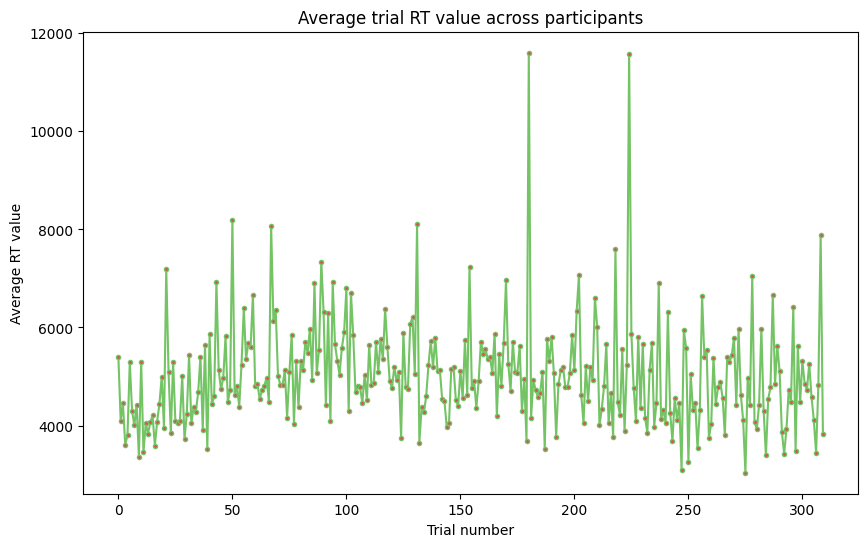

In [5]:
plot_rt_participants(data_dict)

In [6]:
def plot_alpha_participants_per_condition(data_dict: dict) -> None:     
    # Create a DataFrame with the average 'alpha' for each condition for each participant
    data = []
    for participant_id, participant_data in data_dict.items():
        for condition, alpha in participant_data['stats']['avg_alpha_per_condition'].items(): # importantly, participant_data['stats']['avg_alpha_per_condition'] is a dict as ['avg_alpha_per_condition'] is the key and the value is the list containing the avg_alpha of each condition
            data.append({
                'participant_id': participant_id,
                'condition': condition,
                'avg_alpha': alpha
            })
    df = pd.DataFrame(data)

    # Create the boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='condition', y='avg_alpha', data=df, color='#74C365')
    sns.swarmplot(x='condition', y='avg_alpha', data=df, color='#D35151') # a swarmplot plots the participant values themselves (here with red color)

    plt.title('Average Alpha (across participants) per Condition')
    plt.xlabel('Condition')
    plt.ylabel('Average Alpha')

    plt.show()

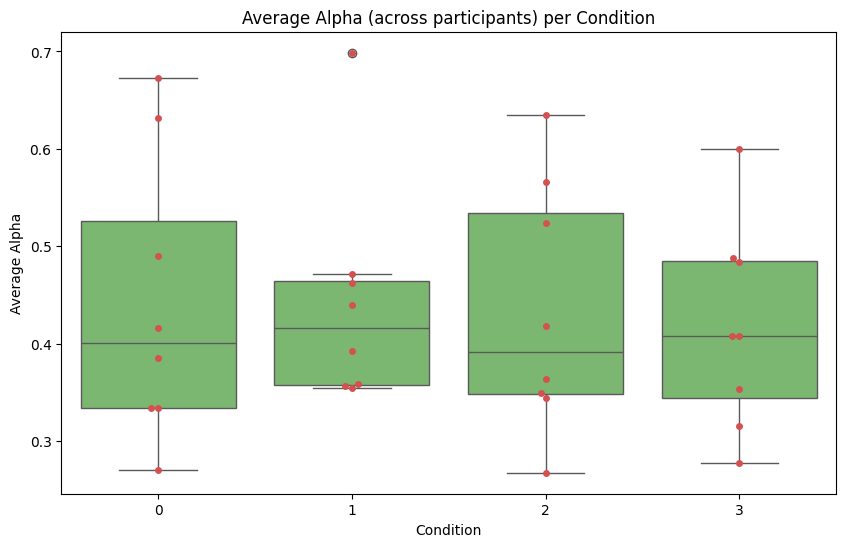

In [7]:
plot_alpha_participants_per_condition(data_dict)

In [8]:
def plot_rt_participants_per_condition(data_dict: dict) -> None:     
    # Create a DataFrame with the average 'alpha' for each condition for each participant
    data = []
    for participant_id, participant_data in data_dict.items():
        for condition, rt in participant_data['stats']['avg_rt_per_condition'].items(): # importantly, participant_data['stats']['avg_alpha_per_condition'] is a dict as ['avg_alpha_per_condition'] is the key and the value is the list containing the avg_alpha of each condition
            data.append({
                'participant_id': participant_id,
                'condition': condition,
                'avg_rt': rt
            })
    df = pd.DataFrame(data)

    # Create the boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='condition', y='avg_rt', data=df, color='#74C365')
    sns.swarmplot(x='condition', y='avg_rt', data=df, color='#D35151') # a swarmplot plots the participant values themselves (here with red color)

    plt.title('Average RT (across participants) per Condition')
    plt.xlabel('Condition')
    plt.ylabel('Average RT')

    plt.show()

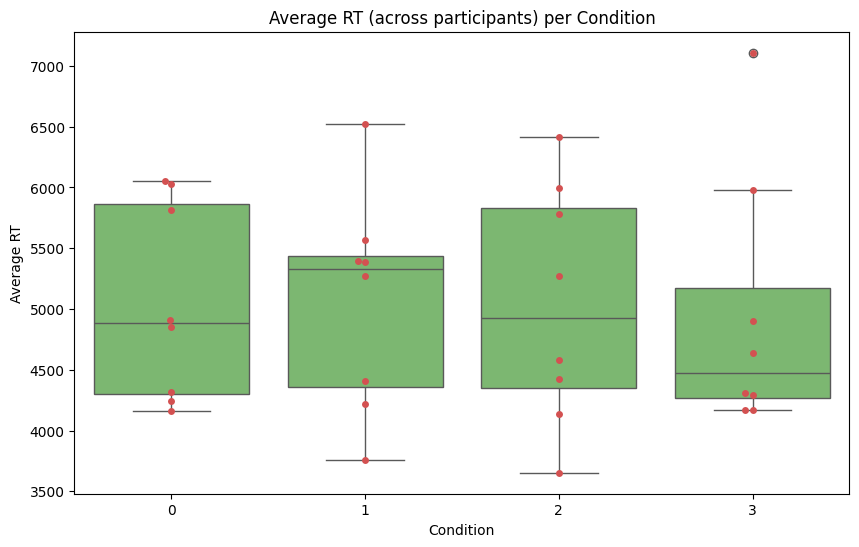

In [9]:
plot_rt_participants_per_condition(data_dict)

Choose a participant:

In [10]:
data_dict.keys()

dict_keys(['20231103095032', '20231103111225', '20231103135654', '20231103171914', '20231104153357', '20231104153436', '20231105135654', '20231105144350'])

In [11]:
participant_id = '20231103171914'

In [12]:
# Plot within participant RT across conditions of selected participant
def plot_within_variation_rt(participant_id: str, data_dict: dict) -> None:

    # Group the data by 'condition' and calculate the mean and standard deviation of 'rt'
    grouped = data_dict[participant_id]['df'].groupby('condition')['rt']
    means = grouped.mean()
    stds = grouped.std()

    plt.figure(figsize=(10, 6))

    # Plot the means with error bars
    plt.errorbar(x=np.arange(4), y=means, yerr=stds, fmt='o', color='#74C365', markerfacecolor='#D35151', markersize=9, capsize=5)
    
    # Set the x-axis labels
    plt.xticks([0, 1, 2, 3], ['Condition 1', 'Condition 2', 'Condition 3', 'Condition 4'])

    plt.ylabel('Average RT')
    plt.xlabel('Condition')
    plt.title('Within-participant Variation in RT')
    plt.ylim([1500, 6850])
    plt.show()

In [13]:
# Plot within participant Alpha across conditions of the selected participant
def plot_within_variation_alpha(participant_id: str, data_dict: dict) -> None:
    
    # Group the data by 'condition' and calculate the mean and standard deviation of 'alpha'
    grouped = data_dict[participant_id]['df'].groupby('condition')['alpha']
    means = grouped.mean()
    stds = grouped.std()

    plt.figure(figsize=(10, 6))

    # Plot the means with error bars
    plt.errorbar(x=np.arange(4), y=means, yerr=stds, fmt='o', color='#74C365', markerfacecolor='#D35151', markersize=9, capsize=5)

    # Set the x-axis labels
    plt.xticks([0, 1, 2, 3], ['Condition 1', 'Condition 2', 'Condition 3', 'Condition 4'])

    plt.ylabel('Mean Alpha')
    plt.xlabel('Condition')
    plt.title('Within-participant Variation in Alpha')
    plt.show()


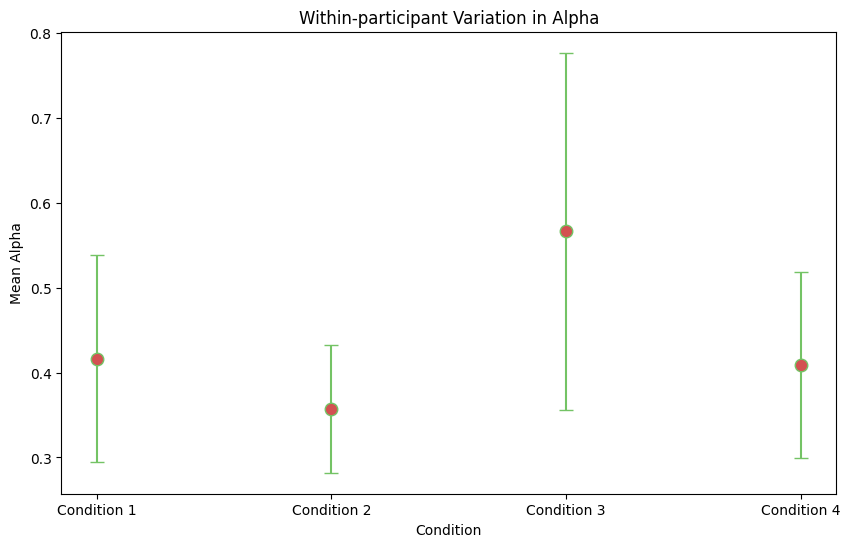

In [14]:
plot_within_variation_alpha(participant_id, data_dict)

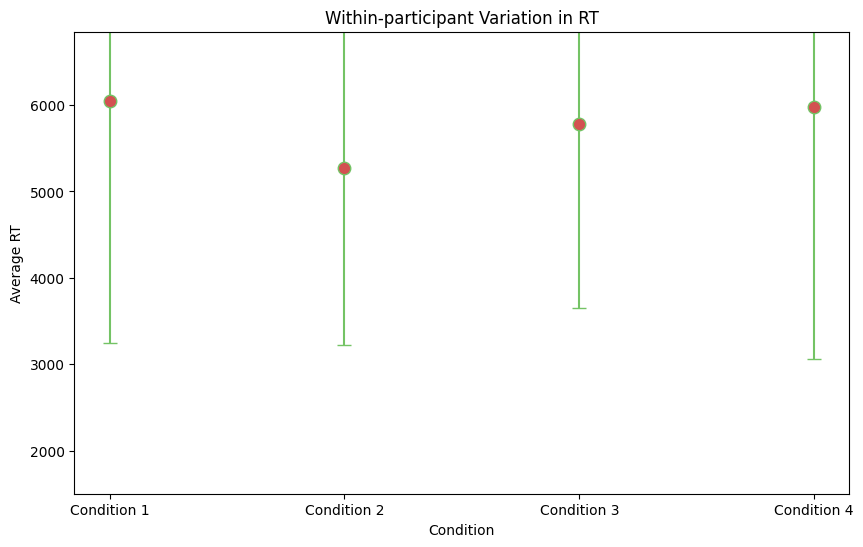

In [15]:
plot_within_variation_rt(participant_id, data_dict)

- The plots and metrics so far indicated the average differences. However, to check if these differences are statistically significant we need to do a few statistical tests.
- Below we show the results of an ANOVA test.

In [16]:
# Check ANOVA assumptions

# Concatenate all dfs
all_data = pd.concat([participant_data['df'] for participant_data in data_dict.values()])

# Group the data by 'condition' and get the 'alpha' values
grouped = all_data.groupby('condition')['alpha']

# Check normality assumption for each condition
for condition, alpha in grouped:
    print(f"Shapiro-Wilk Test for {condition}:", stats.shapiro(alpha))

Shapiro-Wilk Test for 0: ShapiroResult(statistic=0.9133784174919128, pvalue=6.427180951827837e-18)
Shapiro-Wilk Test for 1: ShapiroResult(statistic=0.9043344855308533, pvalue=4.6150755567273065e-18)
Shapiro-Wilk Test for 2: ShapiroResult(statistic=0.8905850648880005, pvalue=6.01329658284356e-18)
Shapiro-Wilk Test for 3: ShapiroResult(statistic=0.9236388206481934, pvalue=1.3703113520464622e-14)


In [17]:
# ANOVA follows

# Concatenate all dfs
concat_dfs = pd.concat([participant_data['df'] for participant_data in data_dict.values()])

# Group the data by 'condition' and get the 'rt' values
grouped = concat_dfs.groupby('condition')['rt']

# Convert each group to a list and store them in a new list
groups = [rts.tolist() for condition, rts in grouped]

fvalue, pvalue = stats.f_oneway(*groups)

print("F-value:", fvalue)
print("P-value:", pvalue)

F-value: 0.4117244290310365
P-value: 0.7445979484362841


- The variable <code><a>groups</a></code> now contains the data across all participants for every one of the four conditions. 
- We now try a non-parametric test, the Mann–Whitney U test which does not require the same assumptions as ANOVA.
- We conduct the test for all pairwise comparisons between the four conditions.

In [18]:
for i in range(len(groups)):
    for j in range(i+1, len(groups)):
        uvalue, pvalue = mannwhitneyu(groups[i], groups[j])
        print(f"Comparison between group {i+1} and group {j+1}:")
        print("U-value:", uvalue)
        print("P-value:", pvalue)
        print()

Comparison between group 1 and group 2:
U-value: 158688.5
P-value: 0.43381628471198475

Comparison between group 1 and group 3:
U-value: 141555.0
P-value: 0.9350683094252181

Comparison between group 1 and group 4:
U-value: 132571.0
P-value: 0.31580932785673477

Comparison between group 2 and group 3:
U-value: 133978.0
P-value: 0.5595713426924389

Comparison between group 2 and group 4:
U-value: 125887.0
P-value: 0.7945942379863739

Comparison between group 3 and group 4:
U-value: 107217.5
P-value: 0.4093294410435342

